    Case  Linhas  Entradas  Saidas  Accuracy Médio          Posbl  \
8      9       6      1364    5397           24.86  4.998423e+243   
10    11       6      1364    5397           24.79  4.998423e+243   
11    12      10      1364    5397           24.79  4.998423e+243   
9     10      10      1364    5397           24.83  4.998423e+243   
13    14       6      2282    2726            0.25  1.233574e+123   
25    28       6      2282    2726            0.48  1.233574e+123   
24    27       7      2282    2726            0.33  1.233574e+123   
12    13       7      2282    2726            0.25  1.233574e+123   
14    15       8       650    2474           24.96  5.155032e+111   
16    19       9       650    2474           25.00  5.155032e+111   
22    25       9       650    2474           25.01  5.155032e+111   
15    16      11       650    2474           24.99  5.155032e+111   
23    26      13       650    2474           24.98  5.155032e+111   
17    20      13       650    2474

<Figure size 800x600 with 0 Axes>

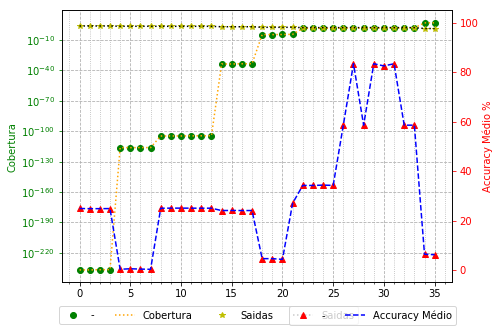

In [54]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (7,5)

headers = ['Case','Linhas','Entradas','Saidas','Accuracy Médio']
#df = pd.read_csv('Base dados ord Leitura.csv', encoding='utf8', names=headers)
df = pd.read_csv('baseBaixaCobertura.csv', encoding='utf8', names=headers)

df["Posbl"] = (2 ** (df['Saidas']*0.15))
#df["Cobertura"] = (df['Linhas']*1000) / np.exp(df['Saidas'])
df["Cobertura"] = ((df['Linhas']*1000) / df['Posbl'])*1000

df = df.sort_values(by=['Cobertura']) 

x = list(range(len(df['Case'])))
#data1 = np.log(df['Linhas'])
#df = df.sort_values(by='Linhas')
data1 = df['Cobertura']
data2 = df['Saidas']
data3 = df['Accuracy Médio']

my_dpi=250

fig = plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
fig, ax1 = plt.subplots()

plt.minorticks_on()
plt.grid(which='major', linestyle='--')
plt.grid(which='minor', linestyle=':')

ax1.set_ylabel('Cobertura', color='g') #verde lateral vertical
ax1.tick_params('y', colors='g')

lns1 = plt.plot(x,data1, 'go', label='-') # green bolinha
lns1 = plt.plot(x,data1, 'k:', color='orange')

plt.yscale('log')
ax2 = ax1.twinx()

lns2 = ax2.plot(x,data3, 'r^' , label='-') # red triangulo 
lns2 = ax2.plot(x,data3, 'k--', color='blue')  # linha tracejada azul
#ax3 = ax1.twinx()
#lns3 = ax3.plot(x,data2, 'm*' , label='saidas') 
lns3 = ax1.plot(x,data2, 'y*' , label='Saidas')
lns3 = ax1.plot(x,data2, 'k:', color='black')

ax2.set_ylabel('Accuracy Médio %', color='r')
ax2.tick_params('y', colors='r')
plt = plt.ylim([-5, 105])

ax1.legend(loc='upper left', bbox_to_anchor=(-0.02, -0.07), shadow=False, ncol=5)
ax2.legend(loc='upper left', bbox_to_anchor=(0.57, -0.07), shadow=False, ncol=5)
fig.savefig('LinhasSimul-VS-Accuracy.png', dpi=100)
print(df)